### Práctica: Análisis de Sistemas en el Dominio del Tiempo vs. Dominio 's'.

**Objetivo:** Analizar un sistema LTI simple en ambos dominios para verificar que la respuesta es la misma. Se comparará el resultado obtenido a través del concepto de convolución en el tiempo con el método de la función de transferencia en el dominio de Laplace (dominio 's').

**Relaciones Fundamentales:**
* **Dominio del Tiempo:** La salida $y(t)$ es la convolución de la entrada $r(t)$ con la respuesta al impulso $h(t)$.
    $$ y(t) = r(t) * g(t) $$
* **Dominio 's' (Laplace):** La transformada de la salida $Y(s)$ es el producto de la transformada de la entrada $R(s)$ y la función de transferencia $G(s)$.
    $$ Y(s) = R(s) \cdot G(s) $$

In [26]:

# Paso 1: Importar las bibliotecas necesarias.

# NumPy: Para operaciones numéricas y manejo de arreglos.
# Matplotlib: Para la visualización y graficación de resultados.
# Python Control Library: Para la creación de sistemas de control y su simulación.
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Configuración para que las gráficas se vean mejor en el notebook.
plt.style.use('seaborn-v0_8-whitegrid')

In [27]:
# Paso 2: Definir el sistema y la entrada

# --- Dominio del Tiempo ---
# Vamos a analizar un sistema de primer orden, como un circuito RC.
# Su respuesta al impulso, g(t), es una exponencial decreciente.
# g(t) = 5 * exp(-2t)

# La entrada, r(t), será una función escalón unitario (valor 1 para t >= 0).
# r(t) = u(t)

# --- Dominio 's' (Laplace) ---
# La Transformada de Laplace de g(t) es la Función de Transferencia G(s).
# G(s) = L{5 * exp(-2t)} = 5 / (s + 2)
# El numerador es [5] y el denominador es [1*s + 2].
numerador = [5]
denominador = [1, 2]
G_s = ct.tf(numerador, denominador)

print("La Función de Transferencia del sistema es:")
print(G_s)

La Función de Transferencia del sistema es:
<TransferFunction>: sys[18]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    5
  -----
  s + 2


In [28]:

# Paso 3: Simular y Calcular la Salida

# La forma más directa de comparar ambos mundos es simular la respuesta del sistema
# a una entrada escalón. La función `step_response` hace precisamente esto:
# Resuelve la ecuación en el tiempo, lo que es equivalente a la convolución,
# utilizando el modelo del sistema en el dominio 's' (la función de transferencia).

# Definimos el vector de tiempo para la simulación
t = np.linspace(0, 5, 500) # Simular de 0 a 5 segundos

# Calculamos la respuesta al escalón para el sistema G(s)
# La función devuelve el tiempo (t) y la salida c(t)
tiempo, c_dominio_tiempo = ct.step_response(G_s, T=t)

# --- Solución Analítica para Comparación ---
# Para verificar, podemos resolver la convolución de forma analítica.
# La convolución de r(t) = u(t) y g(t) = 5*exp(-2t) es:
# c(t) = 2.5 * (1 - exp(-2t))
# Calculamos esta solución para compararla con la simulación.
c_dominio_s = 2.5 * (1 - np.exp(-2 * tiempo))



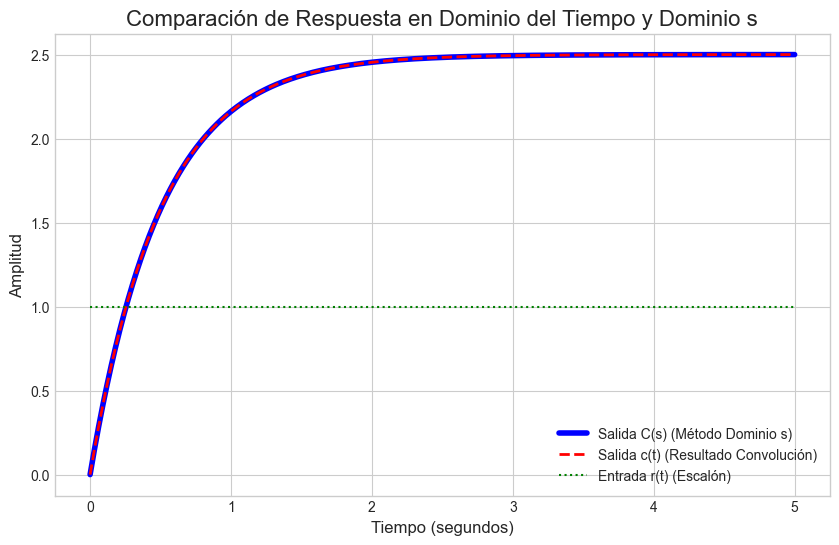

In [29]:
# Paso 4: Graficar y Comparar los Resultados

plt.figure(figsize=(10, 6))

# Graficar la salida obtenida por la simulación de la biblioteca de control
plt.plot(tiempo, c_dominio_tiempo, label='Salida C(s) (Método Dominio s)', linewidth=4, color='blue')

# Graficar la salida calculada analíticamente (resultado de la convolución)
plt.plot(tiempo, c_dominio_s, label='Salida c(t) (Resultado Convolución)', linestyle='--', color='red', linewidth=2)


# Graficar la señal de entrada r(t) para tener una referencia
plt.plot(tiempo, np.ones_like(tiempo), label='Entrada r(t) (Escalón)', linestyle=':', color='green')


# Títulos y etiquetas
plt.title('Comparación de Respuesta en Dominio del Tiempo y Dominio s', fontsize=16)
plt.xlabel('Tiempo (segundos)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

### Conclusión de la Práctica

Como se puede observar en la gráfica, la línea azul (Salida Simulada) y la línea roja punteada (Salida Analítica) **se superponen perfectamente**.

Esto demuestra que:

1.  El método de la **Función de Transferencia** en el dominio 's' es una herramienta precisa para analizar el comportamiento de un sistema.
2.  La simulación realizada por la biblioteca de control, que usa el modelo $H(s)$, produce el mismo resultado que resolver la **integral de convolución** en el dominio del tiempo.
3.  Se confirma que la Transformada de Laplace es un puente eficaz que simplifica el análisis de sistemas, convirtiendo la convolución en una simple multiplicación algebraica.

---



### Ejercicio Propuesto. Circuito RL (Primer Orden)

**Instrucciones:**
Aplica el mismo procedimiento de la práctica anterior para analizar los siguientes dos sistemas. Para cada uno, debes:
1.  A partir de su ecuación diferencial, obtener la **Función de Transferencia** $G(s) = Y(s)/R(s)$.
2.  Calcular de forma **analítica** la respuesta al escalón unitario $c(t)$.
3.  **Simular** la respuesta al escalón en Python usando la función de transferencia y la biblioteca `control`.
4.  **Graficar** en una misma figura la respuesta simulada y la respuesta analítica para comprobar que son idénticas.


Un circuito RL se describe por la siguiente ecuación diferencial, donde la entrada $r(t)$ es el voltaje $V(t)$ y la salida $c(t)$ es la corriente $I(t)$.

$$ L \frac{dc(t)}{dt} + R c(t) = r(t) $$

**Valores de los componentes:**
* Resistencia $R = 4 \, \Omega$
* Inductancia $L = 2 \, H$
* Entrada $r(t)$: Un escalón de **1 Volt** aplicado en $t=0$.


Obtener la función de transferencia $G(s)=\frac{Y(s)}{R(s)}$
y aplicar la transformada de Laplace (condiciones iniciales cero):
$$L(sC(s))+RC(s)=R(s)$$
Factorizar $C(s)$:
$$
C(s)(Ls+R)=R(s)$$
Despejar $G(s)=\frac{C(s)}{R(s)}$:
$$G(s)=\frac{1}{Ls+R}$$

$$G(s)=\frac{1/R}{(L/R)s+1}=\frac{K}{\tau s+1}\quad\text{con}\quad K=\frac{1}{R},\quad\tau=\frac{L}{R}.$$
Aplicando valores numéricos: $R=4$, $L=2$
$$
G(s)=\frac{1}{2s+4}=\frac{1/4}{0.5s+1}\quad\Rightarrow\quad K=\frac{1}{4}=0.25,\quad\tau=\frac{2}{4}=0.5\text{ s}.$$
Escalón unitario (procedimiento usando Laplace)


$$C(s)=G(s)\,R(s)=\frac{1}{(Ls+R)}\cdot\frac{1}{s}=\frac{1}{s(Ls+R)}.$$
Hacemos fracciones parciales:
$$
\frac{1}{s(Ls+R)}=\frac{A}{s}+\frac{B}{Ls+R}.$$
Multiplicando por $s(Ls+R)$:
$$1=A(Ls+R)+Bs=s(AL+B)+AR.$$
$$\left\{\begin{array}{l}AL+B=0\\AR=1\end{array}\right.\Rightarrow A=\frac{1}{R},\quad B=-\frac{L}{R}.$$  Transformada inversa de cada término: $$\mathcal{L}^{-1}\left\{\frac{A}{s}\right\}=A.$$ $$\mathcal{L}^{-1}\left\{\frac{B}{Ls+R}\right\}=\frac{B}{L}e^{-\frac{R}{L}t}(\text{porque }\mathcal{L}^{-1}\left\{\frac{1}{Ls+R}\right\}=\frac{1}{L}e^{\frac{Rt}{L}}).$$ Sustituyendo A y B: $$c(t)=\frac{1}{R}+\frac{B}{L}e^{-\frac{Rt}{L}}=\frac{1}{R}-\frac{1}{R}e^{-\frac{Rt}{L}}=\boxed{\frac{1}{R}(1-e^{-\frac{Rt}{L}})},\quad t\geq 0.$$ 

Funcion de Transferencia del circuito RL:
<TransferFunction>: sys[20]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

   0.5
  -----
  s + 2


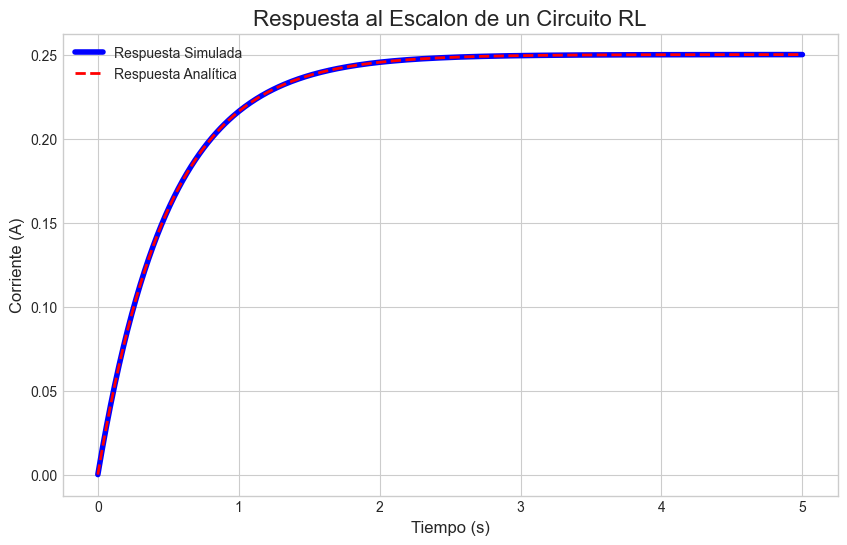

In [30]:
# Circuito RL

# En la biblioteca de control, definimos esto con sus coeficientes:
# El numerador es [0.5]
# El denominador es [1*s + 2], entonces sus coeficientes son [1, 2]
num = [0.5]
den = [1, 2]
Gs_rl = ct.tf(num, den)

# Imprimimos la función de transferencia para verificar
print("Funcion de Transferencia del circuito RL:")
print(Gs_rl)

# Definimos el vector de tiempo para la simulación
t_rl = np.linspace(0, 5, 500) # Simular de 0 a 5 segundos

# Calculamos la respuesta al escalón para el sistema G(s)
# La función devuelve el tiempo (t) y la salida c(t)
tiempo, c_simulada = ct.step_response(Gs_rl, T=t_rl)

# --- Solución Analítica para Comparación ---
# Para verificar, podemos resolver la ecuación diferencial del circuito RL para una entrada escalón.
# La solución analítica de la corriente c(t) para una entrada r(t) = 1 (escalón unitario) es:
# c(t) = 0.25 * (1 - exp(-2t))
# Calculamos esta solución para compararla con la simulación.
c_analitica = 0.25 * (1 - np.exp(-2 * tiempo))


plt.figure(figsize=(10, 6))

# Graficar la salida obtenida por la simulación de la biblioteca de control
plt.plot(tiempo, c_simulada, label='Respuesta Simulada', linewidth=4, color='blue')

# Graficar la salida calculada analíticamente (resultado de la convolución)
plt.plot(tiempo, c_analitica, label='Respuesta Analítica', linestyle='--', color='red', linewidth=2)

# Títulos y etiquetas
plt.title('Respuesta al Escalon de un Circuito RL', fontsize=16)
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Corriente (A)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Conclusión
Al analizar ambas gráficas, tanto del sistema de ejemplo como del circuito RL, se aprecia que la curva de la respuesta simulada y la de la respuesta analítica coinciden completamente. Esta coincidencia valida varios aspectos esenciales de la teoría de Control:

**El uso de la función de transferencia en el dominio 𝑠 permite describir con gran precisión el comportamiento de sistemas lineales invariantes en el tiempo (LTI)**.

**La simulación generada mediante la biblioteca de control, basada en el modelo matemático del sistema, reproduce exactamente el mismo resultado que el obtenido al resolver la ecuación diferencial o la integral de convolución en el dominio temporal**.

**Se confirma que la transformada de Laplace es una herramienta poderosa, ya que convierte una operación de convolución en el tiempo en una multiplicación algebraica sencilla, facilitando así el análisis y la solución de sistemas dinámicos**.